# Unemployment in India

## Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the dataset

In [3]:
df1=pd.read_csv("unemployment in india.csv")
df2=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

## Exploring the first dataset(df1)

## Data cleaning

In [4]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
# getting null values
df1.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
# dropping null values
df1.dropna(inplace=True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [9]:
# getting out the columns in df1
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [10]:
# removing spaces from the column name
df1.columns=df1.columns.str.strip()

In [11]:
# converting the date(object) column to datetime(datetime64[ns])
df1['Date']=pd.to_datetime(df1["Date"],dayfirst=False, errors="coerce")

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2477509880.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date']=pd.to_datetime(df1["Date"],dayfirst=False, errors="coerce")


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [13]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
# checking the minimum and the maximum date contained in df1 the data date range is from May 31,2019 to June 30,2020
print("df1 date range is",df1["Date"].min(), "to", df1["Date"].max())

df1 date range is 2019-05-31 00:00:00 to 2020-06-30 00:00:00


In [15]:
# checking the array of dataset in the column area
df1["Area"].unique()

array(['Rural', 'Urban'], dtype=object)

In [16]:
# checking the count of rural and urban in the area column
df1["Area"].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

In [17]:
# checking the descricptive statistics of dataframe 1
df1.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


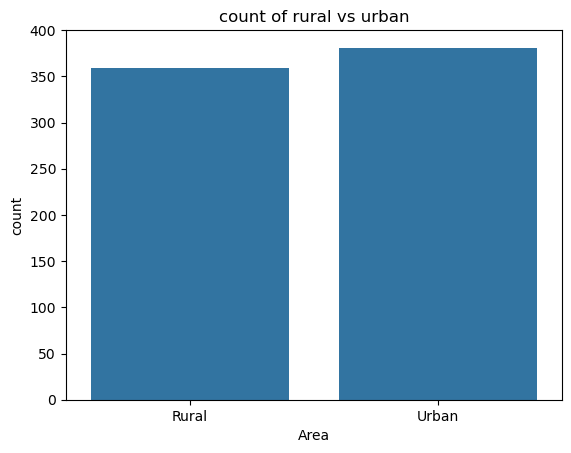

In [18]:
# get the count of rural vs urban entries
sns.countplot(data=df1, x="Area")
plt.title("count of rural vs urban")
plt.show()

### Which area has the highest unemployment rate between May 31, 2019 to June 30, 2020

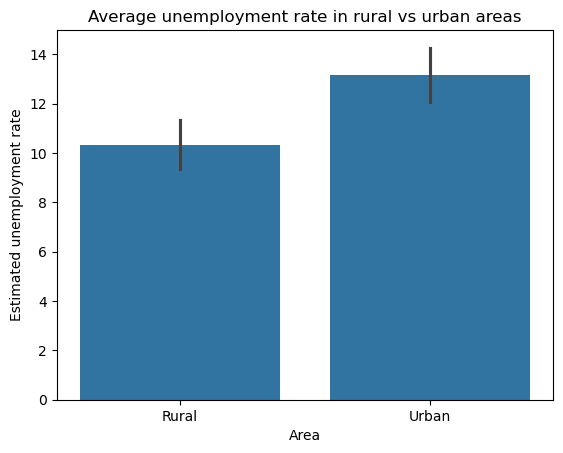

In [19]:
# plot unemployment rate against area
sns.barplot(data=df1, x="Area", y="Estimated Unemployment Rate (%)", estimator=np.mean)
plt.xlabel("Area")
plt.ylabel("Estimated unemployment rate")
plt.title("Average unemployment rate in rural vs urban areas")
plt.plot()
plt.savefig("Urban vs Rural unemployment", dpi=300, bbox_inches="tight")

### Which area has the highest number of employees between May 31, 2019 to June 30, 2020

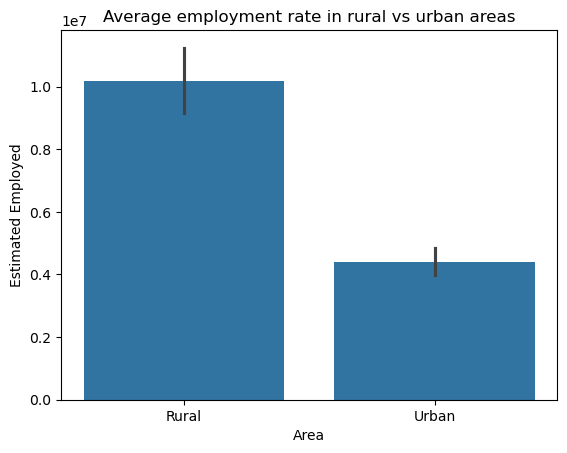

In [20]:
# plotting number of employees against area
sns.barplot(data=df1, x="Area", y="Estimated Employed", estimator=np.mean)
plt.xlabel("Area")
plt.ylabel("Estimated Employed")
plt.title("Average employment rate in rural vs urban areas")
plt.plot()
plt.savefig("Urban vs Rural employment", dpi=300, bbox_inches="tight")

### Which area has the highest Labour Participation rate between May 31, 2019 to June 30, 2020

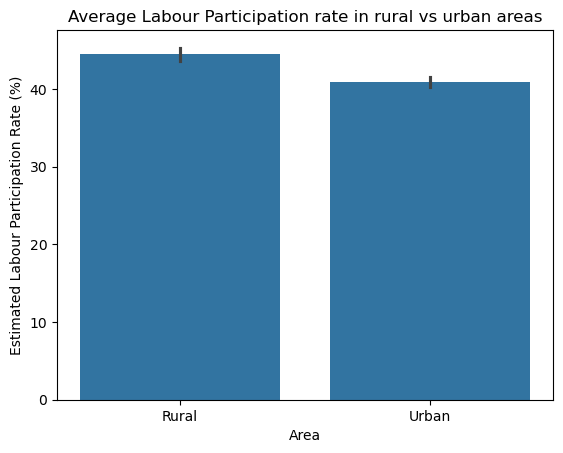

In [21]:
# plot labour participation rate against area
sns.barplot(data=df1, x="Area", y="Estimated Labour Participation Rate (%)", estimator=np.mean)
plt.xlabel("Area")
plt.ylabel("Estimated Labour Participation Rate (%)")
plt.title("Average Labour Participation rate in rural vs urban areas")
plt.plot()
plt.savefig("Urban vs Rural Labour Participation Rate ", dpi=300, bbox_inches="tight")

### Comparing unemployment rate, Estimated Employed and Estimated labour participation rate in rural and urban area in 2019 & 2020

In [22]:
# get out year from df1
df1["Year"]=df1["Date"].dt.year

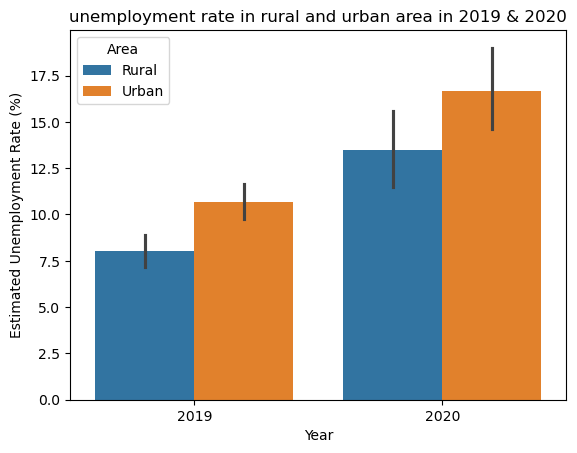

In [23]:
# bar plot of unemployment rate in 2019 and 2020
sns.barplot(data=df1, x="Year", y="Estimated Unemployment Rate (%)", hue="Area", palette="tab10")
plt.title("unemployment rate in rural and urban area in 2019 & 2020")
plt.savefig("Urban vs Rural unemployment in 2019 & 2020", dpi=300, bbox_inches="tight")

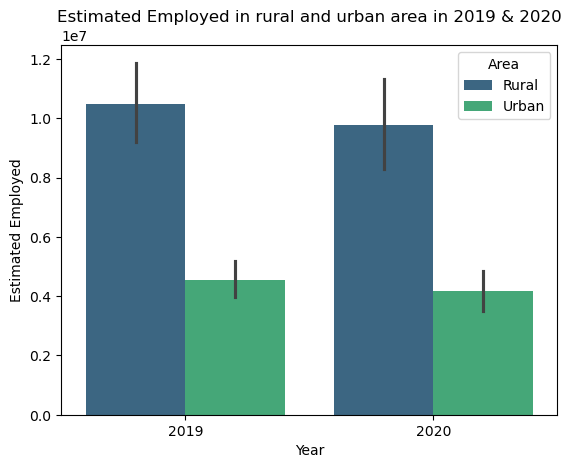

In [24]:
# bar plot of estimated employed in 2019 & 2020
sns.barplot(data=df1, x="Year", y="Estimated Employed", hue="Area", palette="viridis")
plt.title("Estimated Employed in rural and urban area in 2019 & 2020")
plt.savefig("Urban vs Rural employment in 2019 & 2020", dpi=300, bbox_inches="tight")

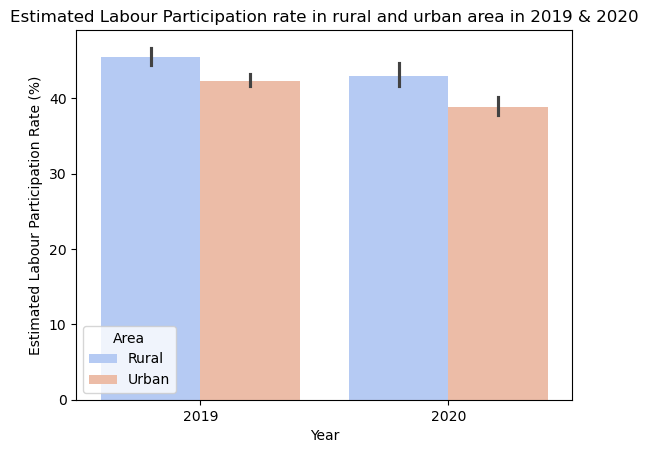

In [25]:
# bar plot of estimated labour participation rate in 2019 & 2020
sns.barplot(data=df1, x="Year", y="Estimated Labour Participation Rate (%)", hue="Area", palette="coolwarm")
plt.title("Estimated Labour Participation rate in rural and urban area in 2019 & 2020")
plt.savefig("Urban vs Rural Labour partipaticipation rate in 2019 & 2020", dpi=300, bbox_inches="tight")

## Exploring the second dataset(df2)

In [26]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [28]:
# getting out the columns in df2
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [29]:
# removing spaces from the column name
df2.columns=df2.columns.str.strip()

In [30]:
# converting the date(object) column to datetime(datetime64[ns])
df2['Date']=pd.to_datetime(df2['Date'], dayfirst=False, errors="coerce")

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2981595131.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date']=pd.to_datetime(df2['Date'], dayfirst=False, errors="coerce")


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), 

In [32]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


In [33]:
# checking the data range of dataframe 2 and it shows that the time span of the dataset is from January 31, 2020 to October 31, 2020
print("df2 date range is", df2["Date"].min(), "to", df2["Date"].max())

df2 date range is 2020-01-31 00:00:00 to 2020-10-31 00:00:00


In [34]:
# checking the descriptive statistics of dataframe 2(df2)
df2.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,2020-06-16 09:15:30.337078528,12.236929,1.396211e+07,41.681573,22.826048,80.532425
min,2020-01-31 00:00:00,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,2020-03-31 00:00:00,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,2020-06-30 00:00:00,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,2020-08-31 00:00:00,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,2020-10-31 00:00:00,75.850000,5.943376e+07,69.690000,33.778200,92.937600
std,NaN,10.803283,1.336632e+07,7.845419,6.270731,5.831738


In [35]:
# checking the array of response in region.1
df2["Region.1"].unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

In [36]:
# checking the counts of each response in region.1
df2["Region.1"].value_counts()

Region.1
North        79
South        60
West         50
East         40
Northeast    38
Name: count, dtype: int64

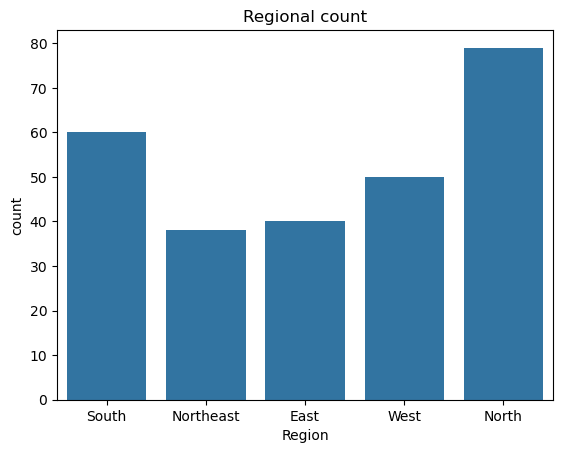

In [37]:
# Plotting region against count
sns.countplot(data=df2, x="Region.1")
plt.xlabel("Region")
plt.title("Regional count")
plt.show()


### Which Region has the highest unemployment rates between January 31, 2020 to October 31, 2020

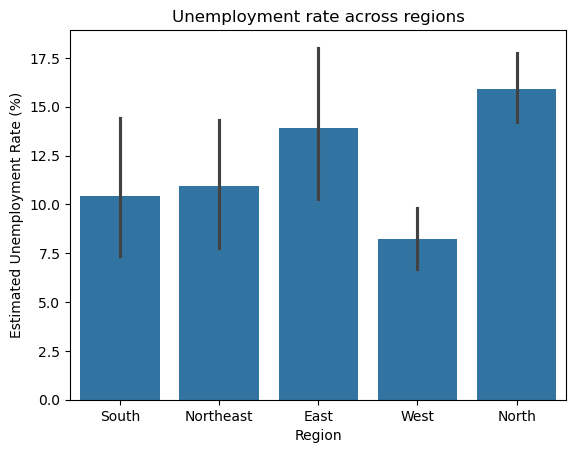

In [99]:
# plot unemployment rate against region
sns.barplot(data=df2, x="Region.1", y="Estimated Unemployment Rate (%)", estimator=np.mean)
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.title("Unemployment rate across regions")
plt.savefig("Regional unemployment trends in 2020", dpi=300, bbox_inches="tight")
plt.savefig(" North India", dpi=300, bbox_inches="tight")
plt.show()

### Which Region has the highest number of employees betwen January 31, 2020 to October 31, 2020

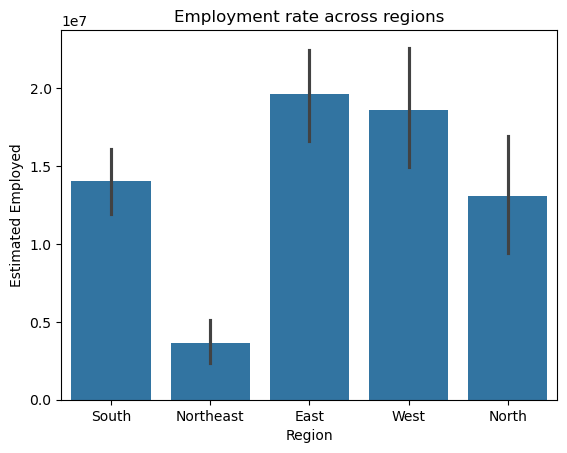

In [100]:
# plot number employed against region
sns.barplot(data=df2, x="Region.1", y="Estimated Employed", estimator=np.mean)
plt.xlabel("Region")
plt.ylabel("Estimated Employed")
plt.title("Employment rate across regions")
plt.savefig("East India", dpi=300, bbox_inches="tight")
plt.show()

### Which Region has the highest Labour Participation Rate betwen January 31, 2020 to October 31, 2020

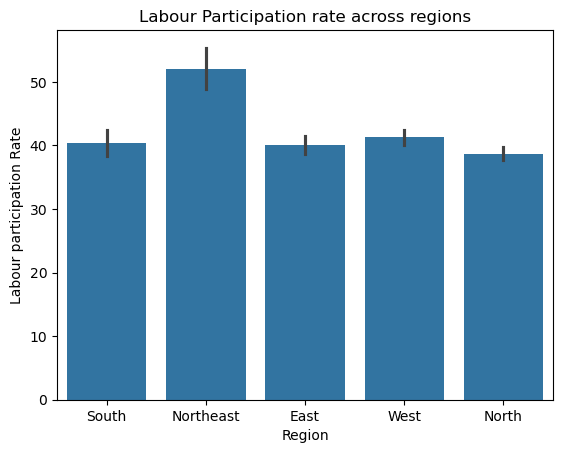

In [40]:
# plot Labour participation rate against region
sns.barplot(data=df2, x="Region.1", y="Estimated Labour Participation Rate (%)", estimator=np.mean) 
plt.xlabel("Region")
plt.ylabel("Labour participation Rate")
plt.title("Labour Participation rate across regions")
plt.savefig("Regional Labour participation trends in 2020", dpi=300, bbox_inches="tight")
plt.show()

## Merging the dataframe

In [41]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019


In [42]:
df1["Frequency"].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [43]:
df2["Frequency"].unique()

array([' M'], dtype=object)

In [44]:
# Standardizing the frequency column
df1["Frequency"]=df1["Frequency"].str.strip().replace({"Monthly": "M"})

In [45]:
# concatenating df1 and df2
df=pd.concat([df1,df2], ignore_index=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                     740 non-null    object        
 7   Year                                     740 non-null    float64       
 8   Region.1                                 267 non-null    object        
 9   longitude                                

In [47]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural,2019.0,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural,2019.0,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural,2019.0,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural,2019.0,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural,2019.0,NaN,NaN,NaN


#### checking for duplicates

In [48]:
df.duplicated().sum()

0

## Exploratory data analysis

In [49]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year,longitude,latitude
count,1007,1007.000000,1.007000e+03,1007.000000,740.000000,267.000000,267.000000
mean,2020-01-31 06:06:04.647467776,11.906991,8.996209e+06,42.378620,2019.418919,22.826048,80.532425
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000,2019.000000,10.850500,71.192400
25%,2019-09-30 00:00:00,4.685000,1.639125e+06,37.835000,2019.000000,18.112400,76.085600
50%,2020-01-31 00:00:00,8.890000,5.543380e+06,40.880000,2019.000000,23.610200,79.019300
75%,2020-05-31 00:00:00,16.125000,1.287115e+07,45.315000,2020.000000,27.278400,85.279900
max,2020-10-31 00:00:00,76.740000,5.943376e+07,72.570000,2020.000000,33.778200,92.937600
std,NaN,10.739549,1.020784e+07,8.048542,0.493716,6.270731,5.831738


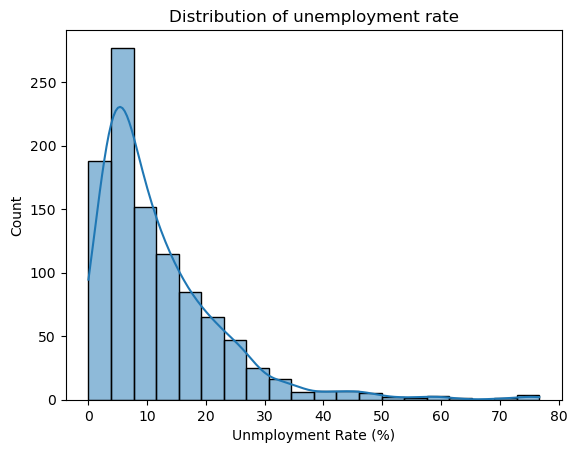

In [50]:
sns.histplot(df["Estimated Unemployment Rate (%)"], bins=20, kde=True)
plt.title("Distribution of unemployment rate")
plt.xlabel("Unmployment Rate (%)")
plt.show()

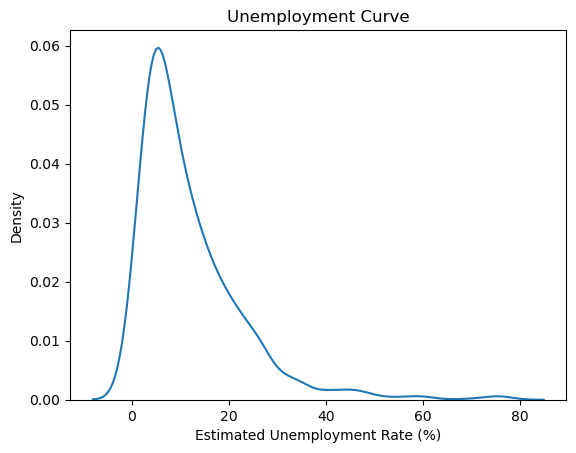

In [51]:
sns.kdeplot(df["Estimated Unemployment Rate (%)"])
plt.title("Distribution of unemployment rate curve")
plt.title("Unemployment Curve")
plt.show()

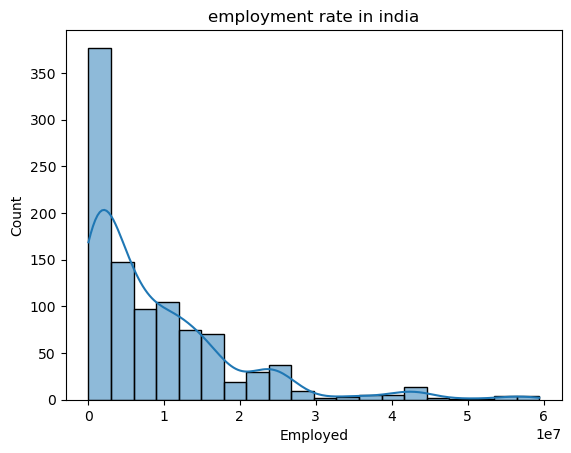

In [52]:
sns.histplot(df["Estimated Employed"], bins=20, kde=True)
plt.xlabel("Employed")
plt.title("employment rate in india")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

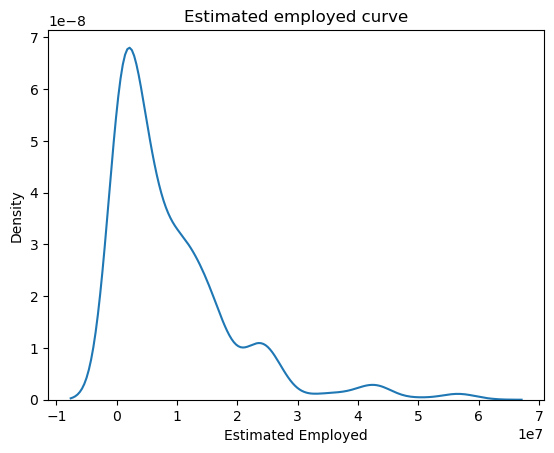

In [53]:
sns.kdeplot(df["Estimated Employed"])
plt.xlabel("Estimated Employed")
plt.title("Estimated employed curve")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

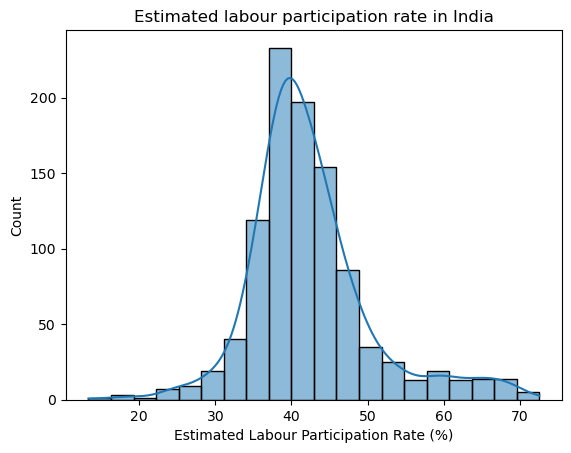

In [54]:
sns.histplot(df["Estimated Labour Participation Rate (%)"], bins=20, kde=True)
plt.title("Estimated labour participation rate in India")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

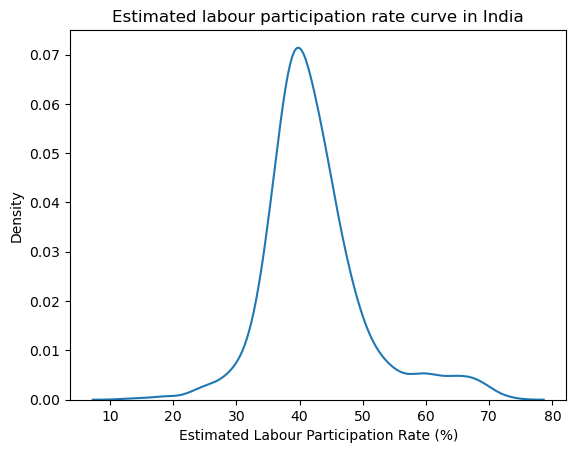

In [55]:
sns.kdeplot(df["Estimated Labour Participation Rate (%)"])
plt.title("Estimated labour participation rate curve in India")
plt.show

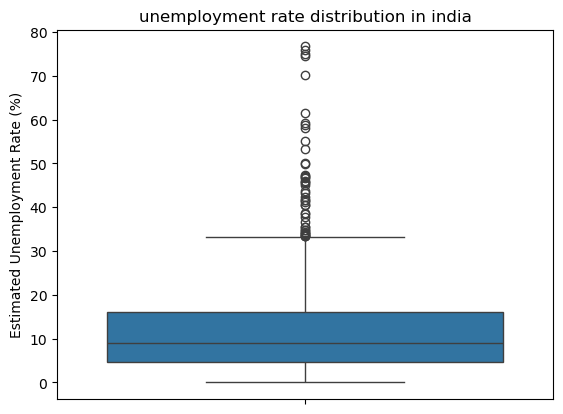

In [56]:
sns.boxplot(y=df["Estimated Unemployment Rate (%)"])
plt.title("unemployment rate distribution in india")
plt.show()

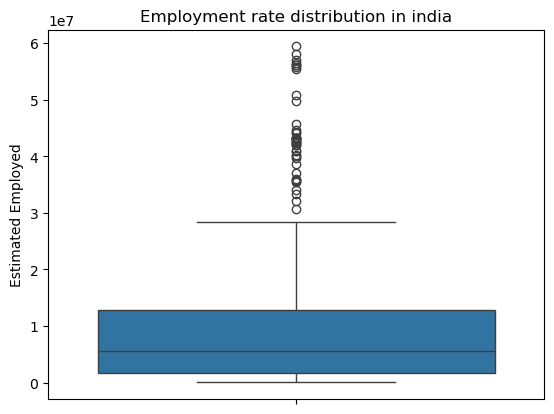

In [57]:
sns.boxplot(y=df["Estimated Employed"])
plt.title("Employment rate distribution in india")
plt.show()

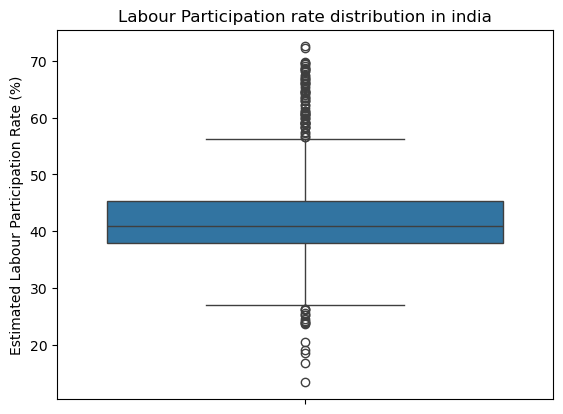

In [58]:
sns.boxplot(y=df["Estimated Labour Participation Rate (%)"])
plt.title("Labour Participation rate distribution in india")
plt.show()

In [59]:
corr_matrix=df[["Estimated Employed","Estimated Unemployment Rate (%)", "Estimated Labour Participation Rate (%)"]].corr()

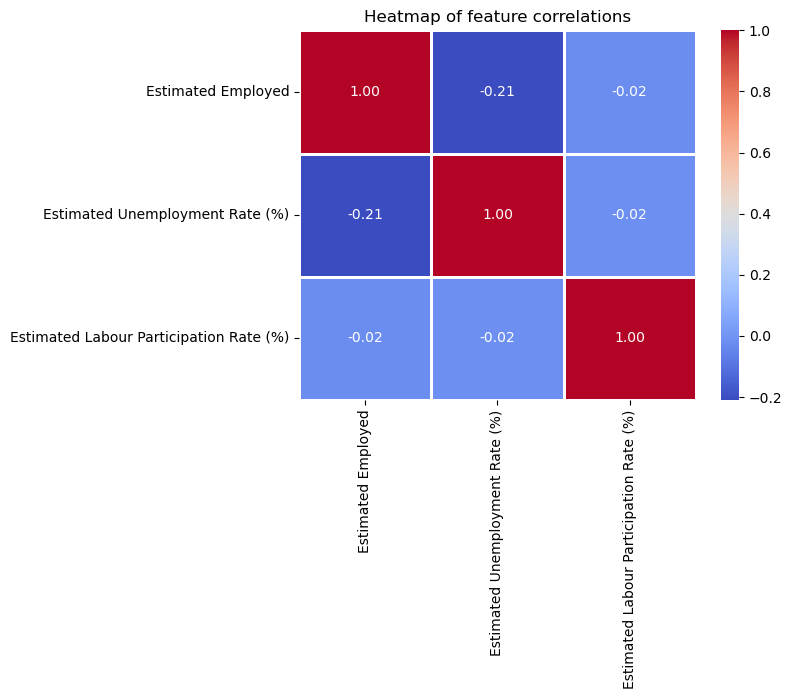

In [60]:
# this shows that there is weak correlation between the features
sns.heatmap(corr_matrix,annot=True, cmap="coolwarm", fmt=".2f",linewidths=1)
plt.title("Heatmap of feature correlations")
plt.show()

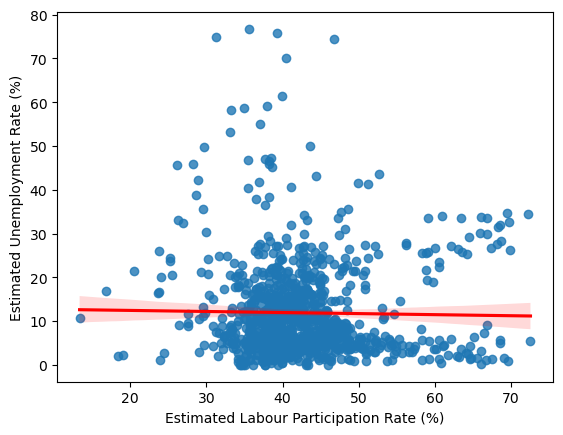

In [61]:
# further checking correlation features between estimated unemployment rate and estimated labour participation rate and this shows that there is no correlation
sns.regplot(data=df, y="Estimated Unemployment Rate (%)", x= "Estimated Labour Participation Rate (%)",line_kws={"color":"red"})
plt.show()

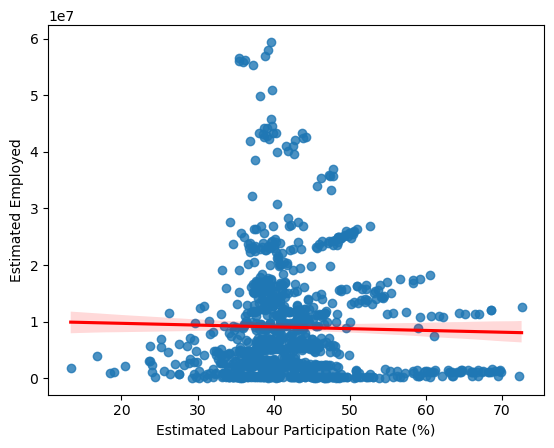

In [62]:
# further checking correlation features between estimated employed and estimated labour participation rate and this shows that there is no correlation
sns.regplot(data=df, y="Estimated Employed", x= "Estimated Labour Participation Rate (%)",line_kws={"color":"red"})
plt.show()


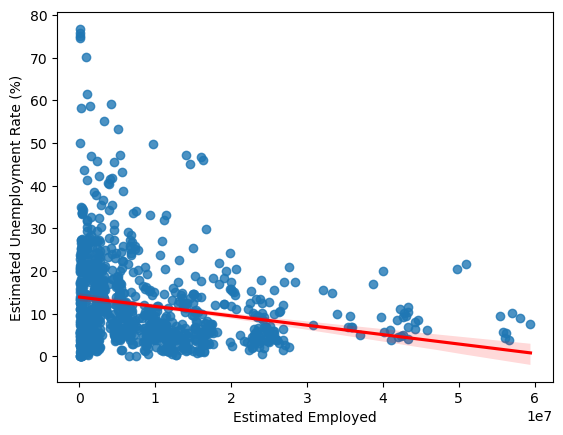

In [63]:
# further checking correlation features between estimated unemployment rate and estimated employed and this shows a weak negative correlation
sns.regplot(data=df, y="Estimated Unemployment Rate (%)", x= "Estimated Employed",line_kws={"color":"red"})
plt.show()

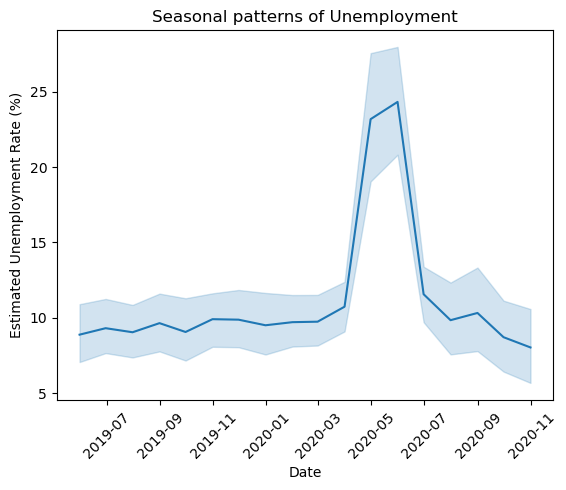

In [64]:
# checking unemployment rate over time
sns.lineplot(data=df,x="Date", y="Estimated Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.title("Seasonal patterns of Unemployment")
plt.savefig("patterns unemployment trends in 2020", dpi=300, bbox_inches="tight")
plt.show()

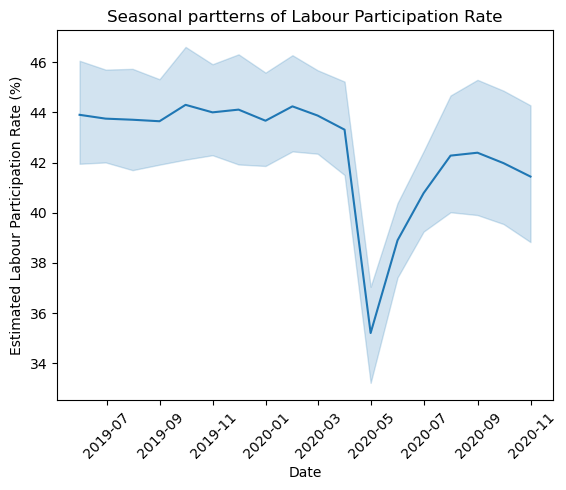

In [65]:
# checking Estimated Labour participation rate over time
sns.lineplot(data=df,x="Date", y="Estimated Labour Participation Rate (%)")
plt.xticks(rotation=45)
plt.title("Seasonal partterns of Labour Participation Rate")
plt.show()

### Which Region has the highest & lowest unemployment rate between May 31, 2019 to October 31, 2020

In [66]:
# grouping unemployment rate according to region
df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

Region
Tripura             27.483158
Haryana             26.597368
Jharkhand           20.309737
Bihar               19.063684
Himachal Pradesh    17.888947
Delhi               17.000263
Jammu & Kashmir     16.275333
Chandigarh          15.991667
Rajasthan           14.534474
Puducherry          12.361389
Punjab              12.017895
Uttar Pradesh       11.810789
Goa                 10.125000
Tamil Nadu          10.048158
Kerala               9.942368
Chhattisgarh         8.866316
West Bengal          8.668684
Sikkim               8.063200
Uttarakhand          7.818919
Andhra Pradesh       7.789474
Maharashtra          7.668421
Telangana            7.499737
Madhya Pradesh       7.261053
Karnataka            6.937105
Gujarat              6.588158
Assam                5.991389
Odisha               5.869474
Meghalaya            4.546757
Name: Estimated Unemployment Rate (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2577697534.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Region", y="Estimated Unemployment Rate (%)", estimator=np.mean, palette="viridis")


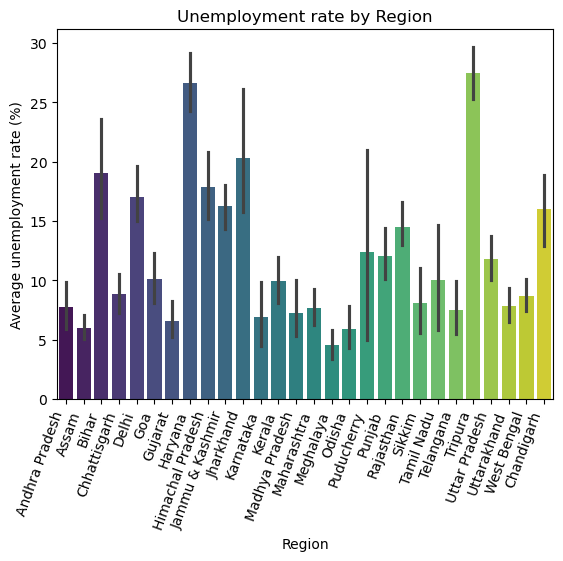

In [67]:
# visualizing unemployment rate according to region
sns.barplot(data=df, x="Region", y="Estimated Unemployment Rate (%)", estimator=np.mean, palette="viridis")
plt.xticks(rotation=70, ha="right")
plt.xlabel("Region")
plt.ylabel("Average unemployment rate (%)")
plt.title("Unemployment rate by Region")
plt.savefig("regional unemployment trends by region", dpi=300, bbox_inches="tight")
plt.show()

### Which Region has the highest & lowest number of employees between May 31, 2019 to October 31, 2020

In [68]:
# grouping employment rate according to region
df.groupby("Region")["Estimated Employed"].mean().sort_values(ascending=False)

Region
Uttar Pradesh       3.531324e+07
Maharashtra         2.504666e+07
West Bengal         2.143712e+07
Bihar               1.532425e+07
Tamil Nadu          1.482701e+07
Gujarat             1.438326e+07
Madhya Pradesh      1.406360e+07
Karnataka           1.355051e+07
Rajasthan           1.259125e+07
Telangana           1.012504e+07
Andhra Pradesh      1.006762e+07
Odisha              8.172349e+06
Assam               6.870190e+06
Punjab              5.656118e+06
Jharkhand           5.601188e+06
Kerala              5.523504e+06
Chhattisgarh        5.387143e+06
Haryana             4.422069e+06
Delhi               3.155226e+06
Jammu & Kashmir     2.252962e+06
Uttarakhand         1.755916e+06
Himachal Pradesh    1.316156e+06
Tripura             8.960261e+05
Meghalaya           8.681364e+05
Chandigarh          3.168312e+05
Goa                 2.898573e+05
Puducherry          2.547739e+05
Sikkim              1.477263e+05
Name: Estimated Employed, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\4284784540.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Region", y="Estimated Employed", estimator=np.mean, palette="coolwarm")


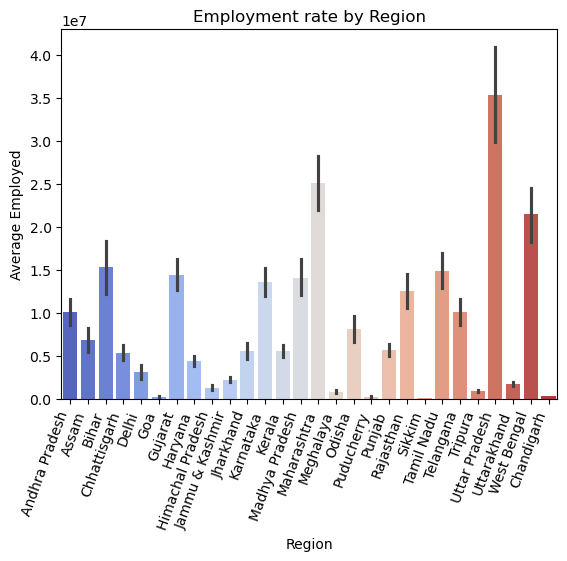

<Figure size 640x480 with 0 Axes>

In [69]:
# visualizing the employment rate according to region
sns.barplot(data=df, x="Region", y="Estimated Employed", estimator=np.mean, palette="coolwarm")
plt.xticks(rotation=70, ha="right")
plt.xlabel("Region")
plt.ylabel("Average Employed")
plt.title("Employment rate by Region")
plt.show()
plt.savefig("regional employment trends in 2020", dpi=300, bbox_inches="tight")

### Which Region has the highest & lowest Labour Participation rate between May 31, 2019 to October 31, 2020

In [70]:
# grouping labour participation rate according to region
df.groupby("Region")["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False)

Region
Tripura             60.777632
Meghalaya           57.831622
Telangana           53.520789
Sikkim              45.969600
Gujarat             45.940263
West Bengal         45.349211
Assam               44.487778
Himachal Pradesh    43.177368
Haryana             42.569474
Chhattisgarh        42.376579
Maharashtra         42.082895
Karnataka           41.517632
Jharkhand           41.324737
Punjab              40.833158
Rajasthan           40.135789
Jammu & Kashmir     40.090000
Tamil Nadu          39.953947
Chandigarh          39.336667
Andhra Pradesh      39.266842
Goa                 39.247353
Uttar Pradesh       38.952368
Madhya Pradesh      38.848947
Odisha              38.616316
Puducherry          38.138611
Delhi               38.121053
Bihar               37.895789
Kerala              34.476842
Uttarakhand         34.176486
Name: Estimated Labour Participation Rate (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2612131756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Region", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="viridis")


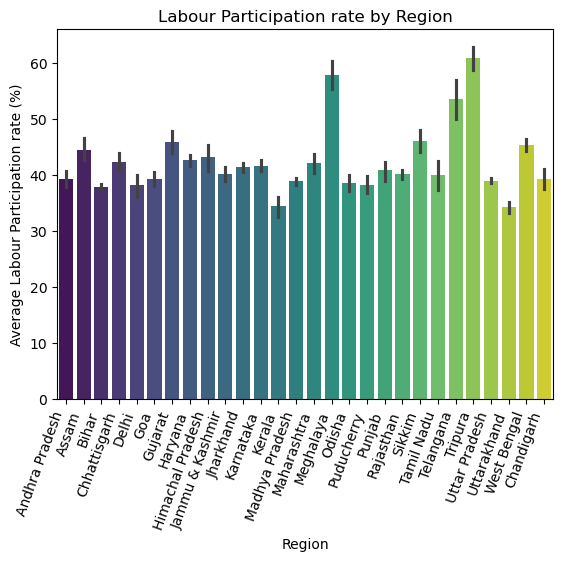

<Figure size 640x480 with 0 Axes>

In [71]:
# visualizing the average labour participation rate by region
sns.barplot(data=df, x="Region", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="viridis")
plt.xticks(rotation=70, ha="right")
plt.xlabel("Region")
plt.ylabel("Average Labour Participation rate (%)")
plt.title("Labour Participation rate by Region")
plt.show()
plt.savefig("regional Labour participation trends by region", dpi=300, bbox_inches="tight")

### When did we have the highest & lowest unemployment rate between May 31,2019 to 0ctober 31, 2020

In [72]:
# checking the array of date we have in the date column
df["Date"].unique()

<DatetimeArray>
['2019-05-31 00:00:00', '2019-06-30 00:00:00', '2019-07-31 00:00:00',
 '2019-08-31 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00',
 '2019-11-30 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00',
 '2020-02-29 00:00:00', '2020-03-31 00:00:00', '2020-04-30 00:00:00',
 '2020-05-31 00:00:00', '2020-06-30 00:00:00', '2020-07-31 00:00:00',
 '2020-08-31 00:00:00', '2020-09-30 00:00:00', '2020-10-31 00:00:00']
Length: 18, dtype: datetime64[ns]

In [73]:
# grouping unemployment rate by date
df.groupby("Date")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False)

Date
2020-05-31    24.310769
2020-04-30    23.167013
2020-06-30    11.555584
2020-03-31    10.728608
2020-08-31    10.313333
2019-10-31     9.900909
2019-11-30     9.868364
2020-07-31     9.834444
2020-02-29     9.734810
2020-01-31     9.702532
2019-08-31     9.637925
2019-12-31     9.497358
2019-06-30     9.303333
2019-09-30     9.051731
2019-07-31     9.033889
2019-05-31     8.874259
2020-09-30     8.705926
2020-10-31     8.026296
Name: Estimated Unemployment Rate (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\3513874891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", estimator=np.mean, palette="viridis")


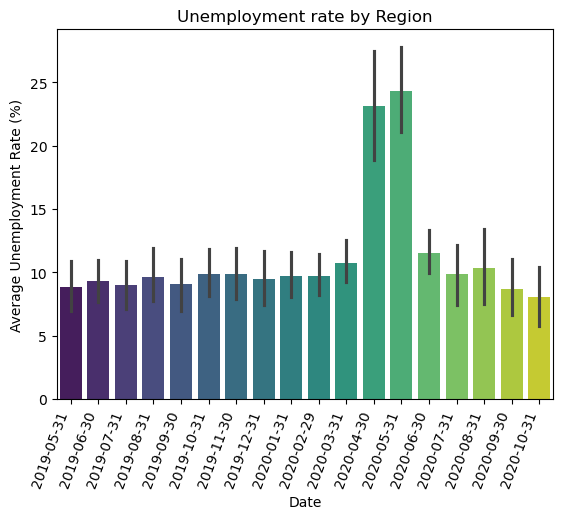

In [74]:
# visualizing unemployment rate by according to date
sns.barplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", estimator=np.mean, palette="viridis")
plt.xticks(rotation=70, ha="right")
plt.xlabel("Date")
plt.ylabel("Average Unemployment Rate (%)")
plt.title("Unemployment rate by Region")
plt.show()

### When did we have the highest and lowest number of employees between May 31,2019 to 0ctober 31, 2020

In [75]:
df.groupby("Date")["Estimated Employed"].mean().sort_values(ascending=False)

Date
2020-09-30    1.458784e+07
2020-10-31    1.457998e+07
2020-08-31    1.442904e+07
2020-07-31    1.441802e+07
2020-01-31    1.029704e+07
2020-02-29    1.019882e+07
2020-03-31    9.916532e+06
2020-06-30    9.655845e+06
2020-05-31    7.827528e+06
2019-09-30    7.739464e+06
2019-08-31    7.539815e+06
2019-05-31    7.410148e+06
2019-07-31    7.404425e+06
2019-12-31    7.377388e+06
2019-06-30    7.358642e+06
2019-10-31    7.298382e+06
2019-11-30    7.273661e+06
2020-04-30    7.068500e+06
Name: Estimated Employed, dtype: float64

### When did we have the highest & lowest Labour Participation Rate between May 31,2019 to 0ctober 31, 2020

In [76]:
# grouping Labour Participation Rate by Date
df.groupby("Date")["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False)

Date
2019-09-30    44.301346
2020-01-31    44.240633
2019-11-30    44.110545
2019-10-31    44.001273
2019-05-31    43.902963
2020-02-29    43.873671
2019-06-30    43.750556
2019-07-31    43.706667
2019-12-31    43.667358
2019-08-31    43.646792
2020-03-31    43.310506
2020-08-31    42.390741
2020-07-31    42.274815
2020-09-30    41.974444
2020-10-31    41.438519
2020-06-30    40.778052
2020-05-31    38.895256
2020-04-30    35.193896
Name: Estimated Labour Participation Rate (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\1045561438.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Date", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="viridis")


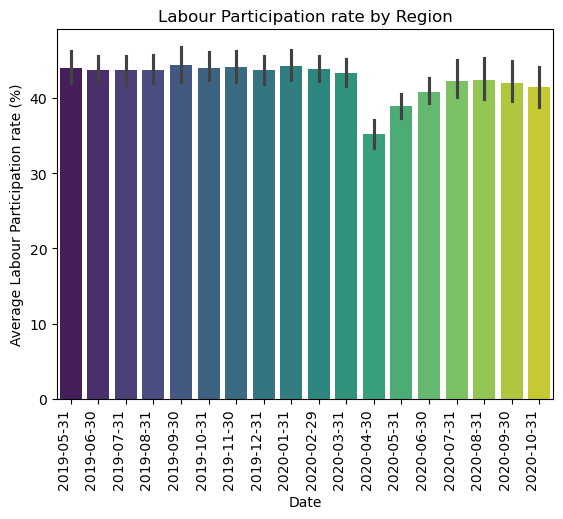

In [77]:
sns.barplot(data=df, x="Date", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Date")
plt.ylabel("Average Labour Participation rate (%)")
plt.title("Labour Participation rate by Region")
plt.show()

## Extract and Explore Covid 19 Data

### df1 date ranges from  May 31, 2019 to June 30, 2020 while df2 ranges from January 31, 2020 to October 31, 2020 while covid 19 spans from March 1, 2020 to December 31, 2020

In [78]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year,Region.1,longitude,latitude
0,Andhra Pradesh,2019-05-31,M,3.65,11999139.0,43.24,Rural,2019.0,NaN,NaN,NaN
1,Andhra Pradesh,2019-06-30,M,3.05,11755881.0,42.05,Rural,2019.0,NaN,NaN,NaN
2,Andhra Pradesh,2019-07-31,M,3.75,12086707.0,43.50,Rural,2019.0,NaN,NaN,NaN
3,Andhra Pradesh,2019-08-31,M,3.32,12285693.0,43.97,Rural,2019.0,NaN,NaN,NaN
4,Andhra Pradesh,2019-09-30,M,5.17,12256762.0,44.68,Rural,2019.0,NaN,NaN,NaN


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
 6   Area                                     740 non-null    object        
 7   Year                                     740 non-null    float64       
 8   Region.1                                 267 non-null    object        
 9   longitude                                

In [80]:
df["Date"].isnull().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1002    False
1003    False
1004    False
1005    False
1006    False
Name: Date, Length: 1007, dtype: bool>

In [81]:
End_date="2020-12-31"
df["Date"]<= End_date

0       True
1       True
2       True
3       True
4       True
        ... 
1002    True
1003    True
1004    True
1005    True
1006    True
Name: Date, Length: 1007, dtype: bool

In [82]:
# Extracting the data of March 1, 2020 to December 31, 2020
start_date= "2020-03-01"
End_date= "2020-12-31"
Covid_data=df[(df["Date"]>= start_date) & (df["Date"]<= End_date)]

In [83]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 10 to 1006
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   419 non-null    object        
 1   Date                                     419 non-null    datetime64[ns]
 2   Frequency                                419 non-null    object        
 3   Estimated Unemployment Rate (%)          419 non-null    float64       
 4   Estimated Employed                       419 non-null    float64       
 5   Estimated Labour Participation Rate (%)  419 non-null    float64       
 6   Area                                     204 non-null    object        
 7   Year                                     204 non-null    float64       
 8   Region.1                                 215 non-null    object        
 9   longitude                                215 n

### Which region has the highest unemployment rate during the period of covid 19

In [84]:
# group data according to region based on unemployment rate 
Covid_data.groupby("Region")[["Estimated Unemployment Rate (%)", "Estimated Employed", "Estimated Labour Participation Rate (%)"]].mean().sort_values (by= "Estimated Unemployment Rate (%)",
                                                                                                                                                       ascending=False)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Region,,,
Haryana,31.617500,4.893928e+06,41.535000
Puducherry,29.343571,2.527679e+05,35.255714
Jharkhand,28.982500,5.926332e+06,39.561250
Bihar,26.678750,1.657233e+07,37.205625
Tripura,25.193750,1.009851e+06,55.205625
Delhi,20.270625,3.139501e+06,32.962500
Tamil Nadu,20.090000,1.446182e+07,34.442500
Rajasthan,16.940000,1.459505e+07,39.290625
Himachal Pradesh,16.470625,1.459114e+06,38.344375


C:\Users\USER\AppData\Local\Temp\ipykernel_5824\925342738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Covid_data, x="Region", y="Estimated Unemployment Rate (%)",estimator= np.mean, palette="viridis")


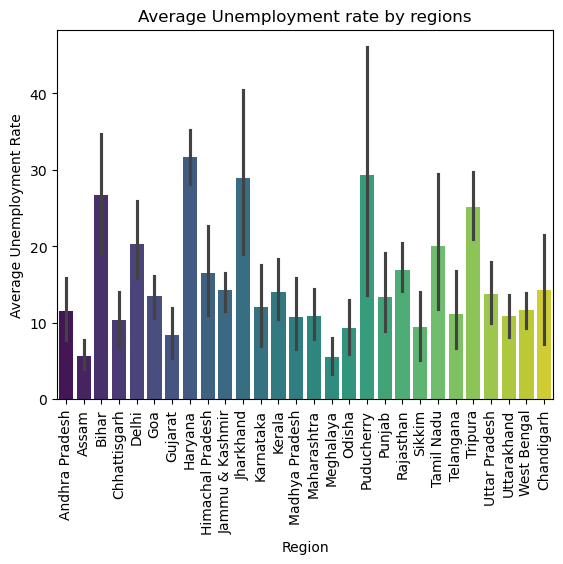

In [85]:
# plot a bar of region against unemployment rate for the period of covid 19
sns.barplot(data=Covid_data, x="Region", y="Estimated Unemployment Rate (%)",estimator= np.mean, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate")
plt.title("Average Unemployment rate by regions")
plt.show()

### Top 10 regions with the highest unemployment rate during the period of covid 19

In [86]:
# group the regions to get out the first 10
unemployment_top_regions=Covid_data.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).head(10).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2197339123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unemployment_top_regions, x="Region", y="Estimated Unemployment Rate (%)", palette="viridis")


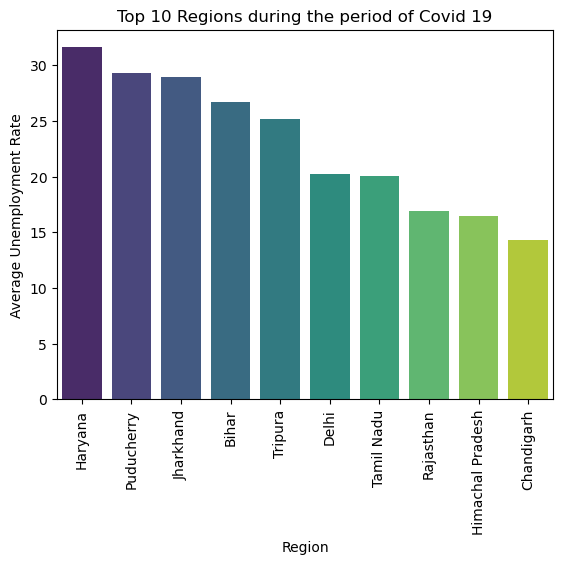

In [87]:
# plot barplot of the 10 top regions
sns.barplot(data=unemployment_top_regions, x="Region", y="Estimated Unemployment Rate (%)", palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate")
plt.title("Top 10 Regions during the period of Covid 19")
plt.savefig("regional unemployment trends in 2020", dpi=300, bbox_inches="tight")
plt.show()

### Which region has the highest number of employees during the period of covid 19

In [88]:
# group covid data according to region based on estimated employed
Covid_data.groupby("Region")["Estimated Employed"].mean().sort_values(ascending=False)

Region
Uttar Pradesh       4.065720e+07
Maharashtra         2.784271e+07
West Bengal         2.386131e+07
Bihar               1.657233e+07
Madhya Pradesh      1.620702e+07
Gujarat             1.614321e+07
Karnataka           1.588667e+07
Rajasthan           1.459505e+07
Tamil Nadu          1.446182e+07
Andhra Pradesh      1.136090e+07
Telangana           1.135038e+07
Odisha              8.903085e+06
Assam               7.894951e+06
Punjab              6.311067e+06
Chhattisgarh        6.092667e+06
Jharkhand           5.926332e+06
Kerala              5.848113e+06
Haryana             4.893928e+06
Delhi               3.139501e+06
Jammu & Kashmir     2.681406e+06
Uttarakhand         2.044568e+06
Himachal Pradesh    1.459114e+06
Meghalaya           1.031527e+06
Tripura             1.009851e+06
Goa                 3.695979e+05
Chandigarh          2.931720e+05
Puducherry          2.527679e+05
Sikkim              1.764796e+05
Name: Estimated Employed, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\3465055779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Covid_data, x="Region", y="Estimated Employed",estimator= np.mean, palette="magma")


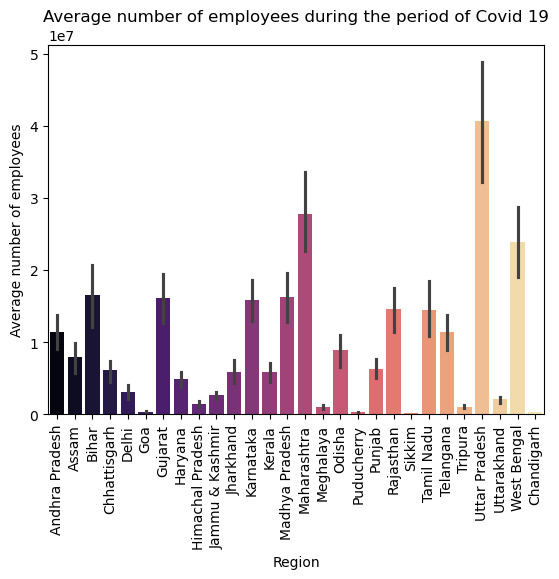

In [89]:
# plot a bar of estimated employed against region during the period of covid 19
sns.barplot(data=Covid_data, x="Region", y="Estimated Employed",estimator= np.mean, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average number of employees")
plt.title("Average number of employees during the period of Covid 19")
plt.savefig("regional employment trends in 2020", dpi=300, bbox_inches="tight")
plt.show()


### Which region has the highest labour participation rate (%) during the period of covid 19

In [90]:
#group data by region based on labour participation rate (%)
Covid_data.groupby("Region")["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False)

Region
Meghalaya           56.780667
Tripura             55.205625
Telangana           51.136250
Sikkim              44.012857
West Bengal         43.168125
Gujarat             43.010625
Karnataka           42.835000
Assam               42.260667
Haryana             41.535000
Goa                 39.847500
Maharashtra         39.707500
Jharkhand           39.561250
Rajasthan           39.290625
Chhattisgarh        38.917500
Punjab              38.390625
Himachal Pradesh    38.344375
Andhra Pradesh      38.103750
Madhya Pradesh      38.063125
Uttar Pradesh       37.966250
Bihar               37.205625
Jammu & Kashmir     36.806667
Odisha              35.560625
Puducherry          35.255714
Chandigarh          35.240000
Tamil Nadu          34.442500
Uttarakhand         34.326667
Delhi               32.962500
Kerala              31.012500
Name: Estimated Labour Participation Rate (%), dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\2880925218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Covid_data, x="Region", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="coolwarm")


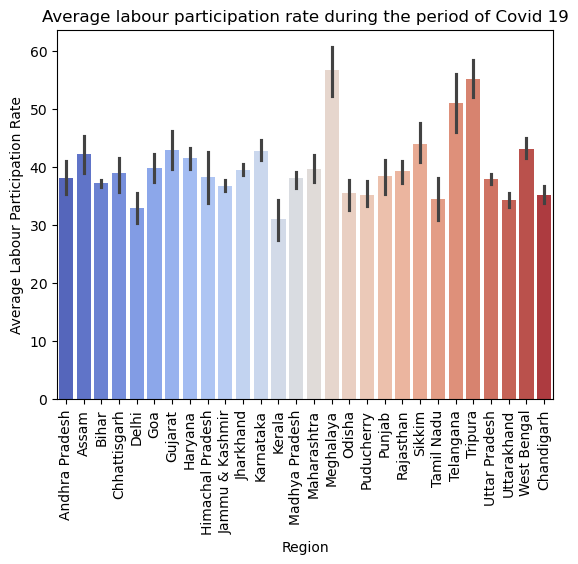

In [101]:
# plot a bar of region against labour participation rate
sns.barplot(data=Covid_data, x="Region", y="Estimated Labour Participation Rate (%)", estimator=np.mean, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Labour Participation Rate")
plt.title("Average labour participation rate during the period of Covid 19")
plt.savefig("Tripura", dpi=300, bbox_inches="tight")
plt.show()
plt.show()

### Top 10 regions with highest Labour participation rate during the period of covid 19

In [92]:
# 10 regions with highest labour participation rate
Labour_participation_top_regions=Covid_data.groupby("Region")["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).head(10).reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_5824\4030045379.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Labour_participation_top_regions, x="Region", y="Estimated Labour Participation Rate (%)", palette="magma")


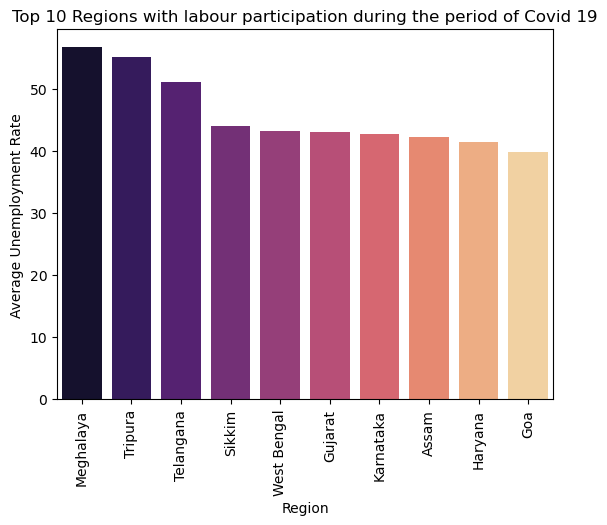

<Figure size 640x480 with 0 Axes>

In [93]:
sns.barplot(data=Labour_participation_top_regions, x="Region", y="Estimated Labour Participation Rate (%)", palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate")
plt.title("Top 10 Regions with labour participation during the period of Covid 19")
plt.show()
plt.savefig("regional Labour participation trends in 2020", dpi=300, bbox_inches="tight")

### What is the seasonal pattern of unemployment during the period of covid 19

Text(0.5, 1.0, 'pattern of unemployment rate during covid 19')

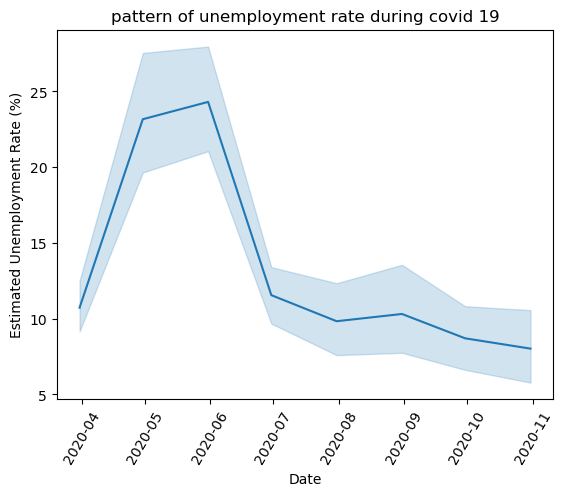

In [94]:
# plot a lineplot of date against unemployment rate
sns.lineplot(data= Covid_data, x="Date", y="Estimated Unemployment Rate (%)")
plt.xticks(rotation=60)
plt.title("pattern of unemployment rate during covid 19")

### what is the seasonal pattern of estimated employed during the period of covid 19

Text(0.5, 1.0, 'patterns of estimated employed')

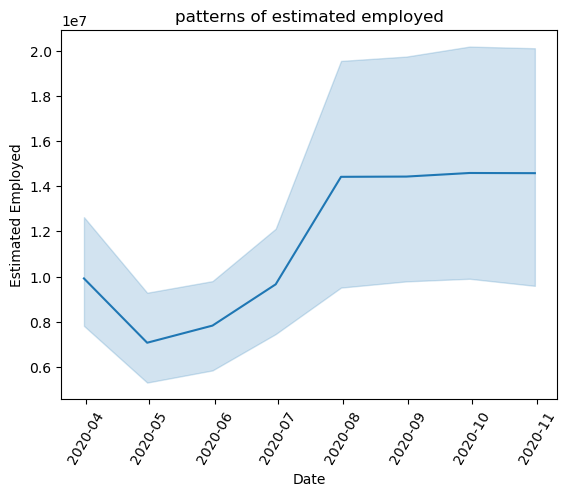

In [95]:
# plot a lineplot of date against estimated employed
sns.lineplot(data= Covid_data, x="Date", y="Estimated Employed")
plt.xticks(rotation=60)
plt.title("patterns of estimated employed")

### What the seasonal pattern of labour participation rate during the period of covid 19

Text(0.5, 1.0, 'patterns of labour participation rate')

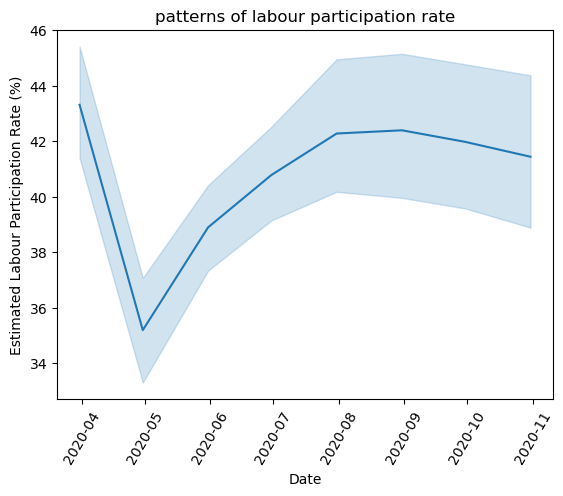

In [96]:
# Plot a lineplot of labour participation rate against time
sns.lineplot(data= Covid_data, x="Date", y="Estimated Labour Participation Rate (%)")
plt.xticks(rotation=60)
plt.title("patterns of labour participation rate")

### What is the pattern of unemployment rate across region during the period of covid 19

Text(0.5, 1.0, 'patterns of unemployment rate across region during covid 19 period')

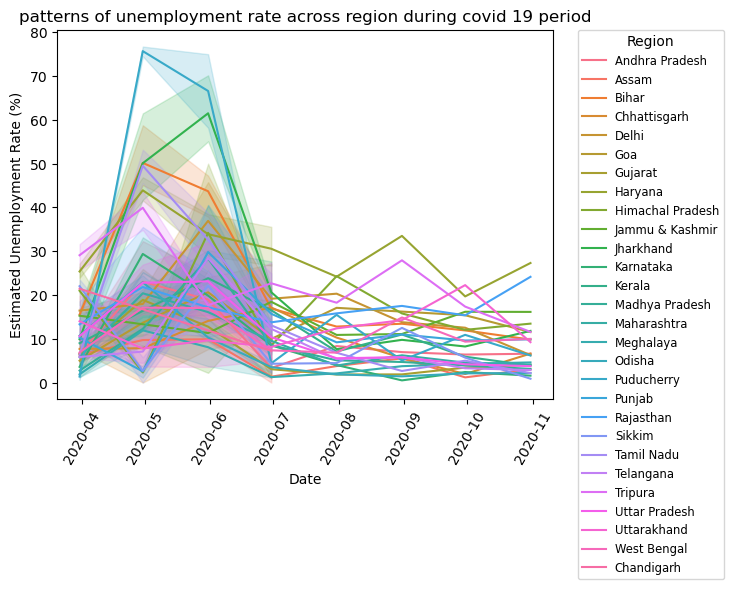

In [97]:
# plot a line of unemployment rate against time with the hue region
sns.lineplot(data=Covid_data, x="Date", y="Estimated Unemployment Rate (%)", hue="Region")
plt.xticks(rotation=60)
plt.legend(title="Region",
bbox_to_anchor=(1.05, 1.0), loc="upper left", borderaxespad=0, fontsize="small")
plt.title("patterns of unemployment rate across region during covid 19 period")

### What is the seasonal pattern of labour participation rate during the period of covid 19

Text(0.5, 1.0, 'patterns of labour participation rate across region during covid 19 period')

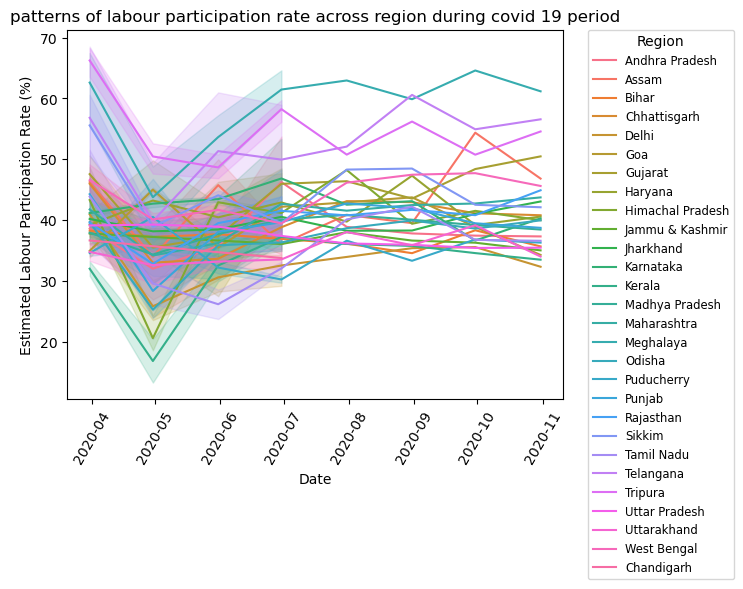

In [98]:
# plot a line of labour participation rate against time with the hue region
sns.lineplot(data=Covid_data, x="Date", y="Estimated Labour Participation Rate (%)", hue="Region")
plt.xticks(rotation=60)
plt.legend(title="Region",
bbox_to_anchor=(1.05, 1.0), loc="upper left", borderaxespad=0, fontsize="small")
plt.title("patterns of labour participation rate across region during covid 19 period")